https://medium.com/walmartglobaltech/sparse-transformers-and-longformers-a-comprehensive-summary-of-space-and-time-optimizations-on-4caa5c388693#:~:text=1.%20Generating%20Long%20Sequences%20with%20Sparse%20Transformers.%202.%20Longformer:%20The

https://medium.com/@vishal09vns/sparse-attention-dad17691478c#:~:text=In%20this%20blog%20post,%20we%20learn%20about%20Big%20Bird,%20a

https://towardsdatascience.com/long-form-video-representation-learning-part-2-video-as-sparse-transformers-29fbd0ed9e71

https://arxiv.org/pdf/1904.10509

https://medium.com/@iitmdinesh/sparse-transformers-922e010bbd27

https://sh-tsang.medium.com/review-sparse-transformer-80cbba4ebaa4#:~:text=Sparse%20Transformer%20is%20proposed,%20introducing%20sparse%20factorizations%20of%20the%20attention

https://huggingface.co/blog/big-bird

## Gradient Checkpointing

xem thêm trực quan ở đây : https://medium.com/tensorflow/fitting-larger-networks-into-memory-583e3c758ff9

Như hình minh họa có L layer (9 layers)

Việc tính toán cho toàn bộ là tốn đến O(L) memory. tại sao chúng ta không tìm cách giảm bớt chúng check point là một kỹ thuật giúp ta giảm xuống về O(sqrt(L))

Nó hoạt động như sau:

**Cập nhật trọng số** của một lớp ‘l’ trong mạng nơ-ron **qua backpropagation** yêu cầu các kích hoạt (activations) của tất cả các lớp sau đó kết nối với lớp ‘l’ phải được lưu trong bộ nhớ. Nói cách khác, kích hoạt của nút Q chỉ có thể bị xóa khỏi bộ nhớ khi tất cả các nút trong các lớp trước đó, những lớp sẽ sử dụng kích hoạt của Q để cập nhật trọng số của chúng, đã cập nhật xong trọng số. Vì vậy, bộ nhớ cần thiết cho backpropagation tỉ lệ thuận với số lớp và tăng đáng kể đối với các mô hình sâu.

Gradient checkpointing khắc phục hạn chế này bằng cách **chỉ giữ lại kích hoạt của một số lớp được đánh dấu** là các điểm kiểm tra (checkpoints) trong bộ nhớ. Kích hoạt của các lớp còn lại có thể được tính lại bằng cách sử dụng kích hoạt của các điểm kiểm tra (checkpoints). Nếu lựa chọn các điểm kiểm tra là tối ưu, phương pháp này sẽ giảm đáng kể yêu cầu về bộ nhớ với chi phí chỉ cần thêm một lượt truyền xuôi (forward pass). Ví dụ, nếu kích hoạt của mỗi lớp thứ sqrt(L) được lưu trong bộ nhớ (với L là tổng số lớp), thì độ phức tạp bộ nhớ của backpropagation trở nên tỉ lệ với O(√L), ít hơn rất nhiều so với O(L). Đối với các nút ở các lớp giữa các điểm kiểm tra, chỉ cần một lượt truyền xuôi để tính lại kích hoạt cho tất cả các nút đó. Trong hình 2 dưới đây, kích hoạt A⁽¹⁾, A⁽⁴⁾, A⁽⁷⁾ có thể được lưu trữ trong bộ nhớ và sau đó có thể được dùng để tính lại kích hoạt của A⁽²⁻³⁾, A⁽⁴⁻⁵⁾ và A⁽⁸⁻⁹⁾ tương ứng.

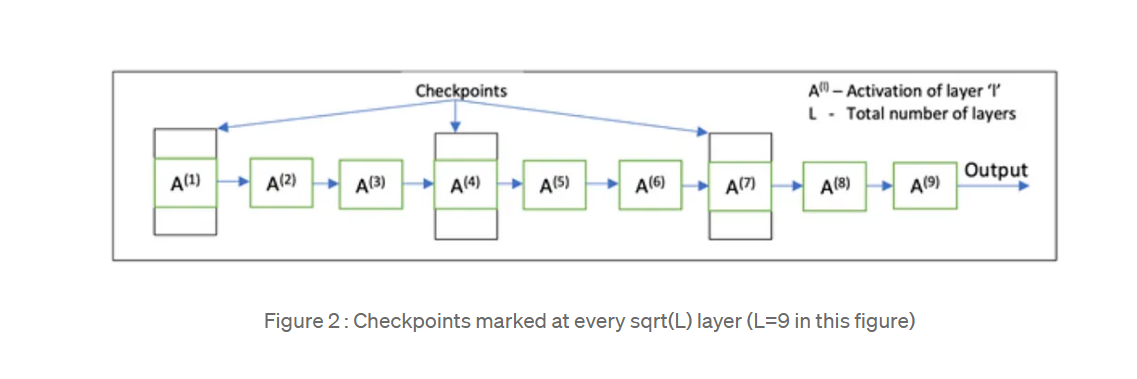

## Generating Long Sequences with Sparse Transformers (OpenAI)

xem thêm : https://medium.com/walmartglobaltech/sparse-transformers-and-longformers-a-comprehensive-summary-of-space-and-time-optimizations-on-4caa5c388693#:~:text=1.%20Generating%20Long%20Sequences%20with%20Sparse%20Transformers.%202.%20Longformer:%20The

Sparse Transformers used for image. Bởi vì trong hình ảnh việc sử dụng các attention thưa thớt rất hữu ích

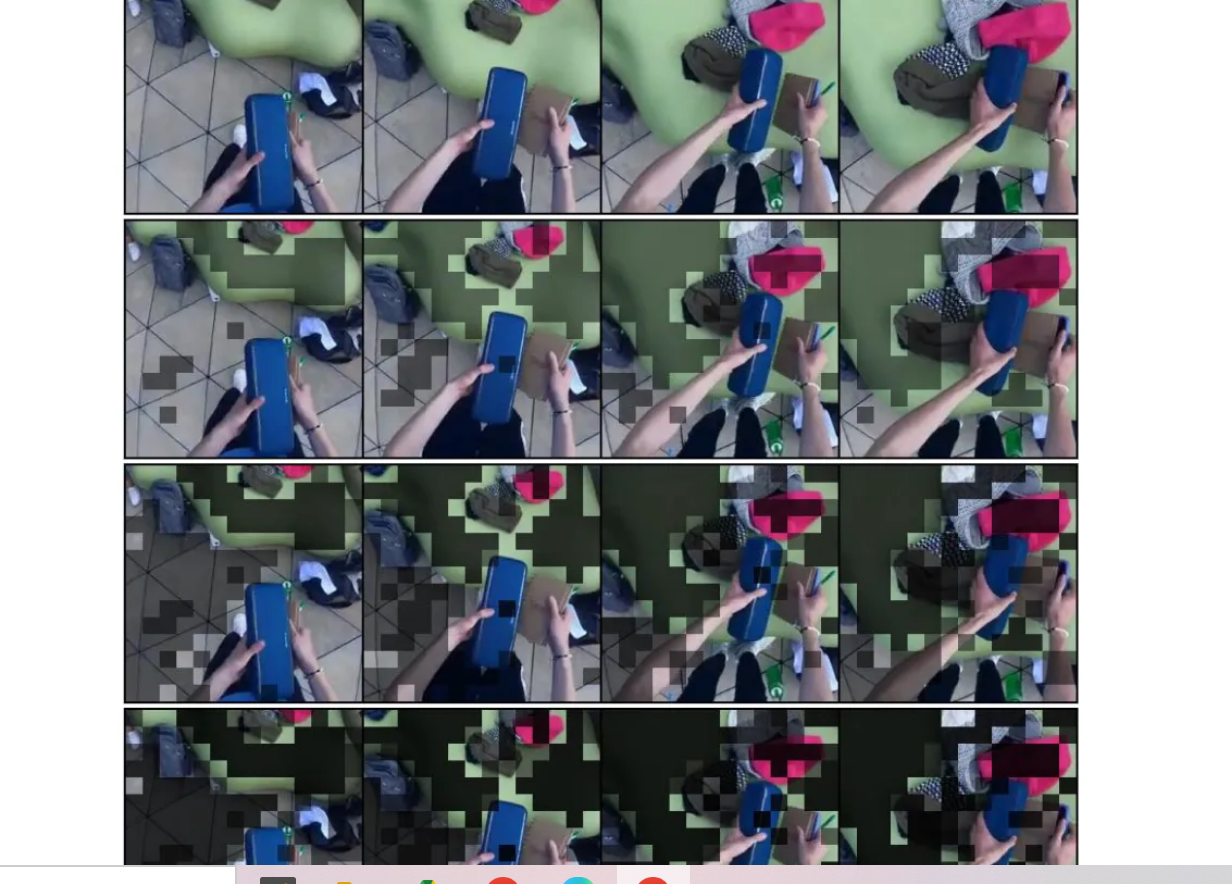

Chúng tôi đã giới thiệu Máy biến áp thưa thớt và cho thấy chúng đạt được hiệu suất tương đương hoặc tốt hơn khi lập mô hình mật độ của các chuỗi dài so với Máy biến áp tiêu chuẩn trong khi yêu cầu ít thao tác hơn đáng kể. Hiệu suất này là hiện đại nhất về hình ảnh và văn bản và có thể dễ dàng thích ứng với âm thanh thô. Mô hình này thể hiện việc sử dụng bối cảnh dài hạn và tạo ra các mẫu thống nhất trên toàn cầu


Giới thiệu sparse transformer có 2 loại attention:

strided attention như cái tên attention bước nhảy:

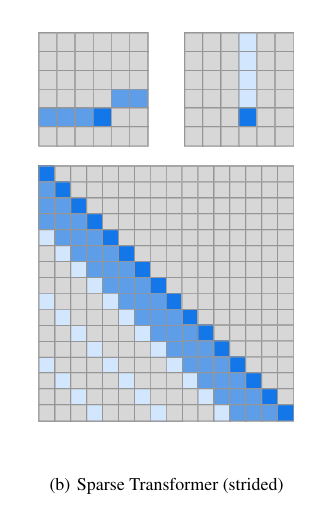

Fixed Attention

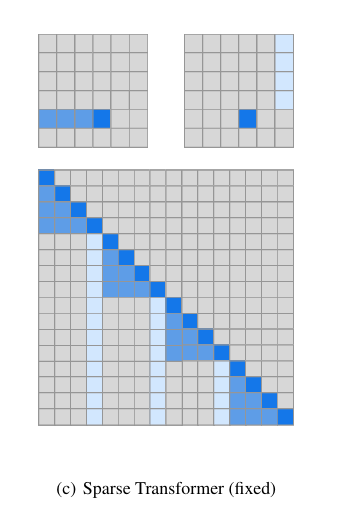

xem thêm cách tạo ra các attention : https://medium.com/walmartglobaltech/sparse-transformers-and-longformers-a-comprehensive-summary-of-space-and-time-optimizations-on-4caa5c388693#:~:text=1.%20Generating%20Long%20Sequences%20with%20Sparse%20Transformers.%202.%20Longformer:%20The

# Longformer: The Long-Document Transformer (Allen Institute for AI)


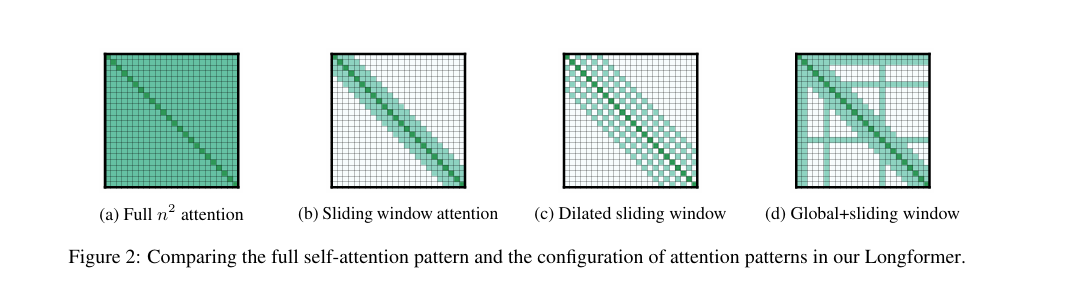

Giới thiệu 4 attention lợi íchcủa chúng như sau :

**a. Sliding window Attention** : In this mechanism, each data point in the sequence attends to ‘w/2’ data points on both sides of it, ‘w’ being the size of window. The size of the window does not remain constant across all the layers, but increases as we move deeper into the network. A layer ‘l’ has window size of l*w, allowing it to have wider local attention.
Complexity: For a sequence of length ’n’, the complexity of sliding window attention is O(n*l*w), which is linear in ‘n’.

**b. Dilated Sliding Window attention** : To increase the attention span of each data point without an increase in complexity, gaps of size ‘d’ are introduced in the windows in each layer. A data point still attends to w/2 tokens on either side but those tokens are not contiguous anymore. They have gaps of ‘d’ between them. This increases attention span of a token significantly as now words can attend to very far off words. ‘d’ can be set to different values for each layer.
Complexity: For a sequence of length ’n’, the complexity of dilated sliding window attention is O(n*l*d*w), which is linear in ‘n’.

**c. Global attention** : Longformers introduce global attention only for few tokens in the sequence, thus keeping the complexity to linear and harnessing benefits of few important words attending to all words in sequence. The tokens for global attention are decided based on the nature of task. For example, for question answering tasks, the tokens in question are chosen for global attention. Similarly, in classification tasks, the classifier (CLS) token at the end of sequence attends to all tokens in sequence. To improve the performance, global attention operation is made symmetric, i.e., tokens chosen for global attention attend to all tokens in the sequence and all tokens in sequence attend to them.
Complexity : Since very few tokens are chosen for global attention, the complexity of this operation remains constant in ‘n’ and overall complexity remains linear in ‘n’.

**d. Linear projections for global attention**: Unlike transformers which use single set of Q,K and V vectors, longformers use separate sets of linear projections for sliding window (Qₛ, Kₛ and Vₛ) and global (universal) attention (Qᵤ, Kᵤ and Vᵤ). This helps the models learn different types of attention pattern using the same network and leads to improvement in its performance.
Complexity : There is no additional complexity for using different set of linear projections for sliding and global attention patterns. The complexity still remains linear in ‘n’ due to this operation.



**a. Cơ chế chú ý cửa sổ trượt (Sliding window Attention)**: Trong cơ chế này, mỗi điểm dữ liệu trong chuỗi sẽ chú ý đến ‘w/2’ điểm dữ liệu ở cả hai bên, với ‘w’ là kích thước của cửa sổ. Kích thước của cửa sổ không cố định trên tất cả các lớp mà tăng dần khi di chuyển sâu hơn vào mạng. Một lớp ‘l’ có kích thước cửa sổ là l*w, cho phép nó có sự chú ý cục bộ rộng hơn.  
Độ phức tạp: Với chuỗi có độ dài ‘n’, độ phức tạp của cơ chế chú ý cửa sổ trượt là O(n*l*w), tuyến tính theo ‘n’.

**b. Cơ chế chú ý cửa sổ trượt giãn cách (Dilated Sliding Window Attention)**: Để tăng phạm vi chú ý của mỗi điểm dữ liệu mà không làm tăng độ phức tạp, các khoảng cách có kích thước ‘d’ được thêm vào trong cửa sổ ở mỗi lớp. Một điểm dữ liệu vẫn chú ý đến w/2 token ở cả hai bên, nhưng các token này không liên tục nữa. Chúng có khoảng cách ‘d’ giữa chúng. Điều này giúp mở rộng đáng kể phạm vi chú ý của một token vì giờ đây các từ có thể chú ý đến những từ ở rất xa. Giá trị ‘d’ có thể được thiết lập khác nhau cho mỗi lớp.  
Độ phức tạp: Với chuỗi có độ dài ‘n’, độ phức tạp của cơ chế chú ý cửa sổ trượt giãn cách là O(n*l*d*w), tuyến tính theo ‘n’.

**c. Cơ chế chú ý toàn cục (Global Attention)**: Longformers chỉ giới thiệu cơ chế chú ý toàn cục cho một số ít token trong chuỗi, do đó giữ độ phức tạp tuyến tính và tận dụng lợi thế của một số từ quan trọng có thể chú ý đến tất cả các từ trong chuỗi. Các token được chọn cho chú ý toàn cục dựa trên bản chất của nhiệm vụ. Ví dụ, đối với các nhiệm vụ trả lời câu hỏi, các token trong câu hỏi được chọn để chú ý toàn cục. Tương tự, trong các nhiệm vụ phân loại, token phân loại (CLS) ở cuối chuỗi chú ý đến tất cả các token trong chuỗi. Để cải thiện hiệu suất, cơ chế chú ý toàn cục được thực hiện đối xứng, tức là các token được chọn cho chú ý toàn cục sẽ chú ý đến tất cả các token trong chuỗi và tất cả các token trong chuỗi cũng chú ý đến chúng.  
Độ phức tạp: Vì chỉ có rất ít token được chọn cho chú ý toàn cục, nên độ phức tạp của thao tác này vẫn không đổi theo ‘n’ và độ phức tạp tổng thể vẫn là tuyến tính theo ‘n’.

**d. Phép chiếu tuyến tính cho chú ý toàn cục (Linear Projections for Global Attention)**: Không giống như các transformers sử dụng một bộ duy nhất của các vector Q, K, và V, longformers sử dụng các bộ phép chiếu tuyến tính riêng biệt cho chú ý cửa sổ trượt (Qₛ, Kₛ và Vₛ) và chú ý toàn cục (Qᵤ, Kᵤ và Vᵤ). Điều này giúp các mô hình học được các mô hình chú ý khác nhau trong cùng một mạng và cải thiện hiệu suất của chúng.  
Độ phức tạp: Việc sử dụng các bộ phép chiếu tuyến tính khác nhau cho các mẫu chú ý trượt và toàn cục không tạo thêm độ phức tạp. Độ phức tạp vẫn tuyến tính theo ‘n’ với thao tác này.

# Big Bird: Transformers for Longer Sequences


https://medium.com/@vishal09vns/sparse-attention-dad17691478c#:~:text=In%20this%20blog%20post,%20we%20learn%20about%20Big%20Bird,%20a

Feasibility and Motivation: Kết hợp 3 attention khác nhau thành một attention Bigbird

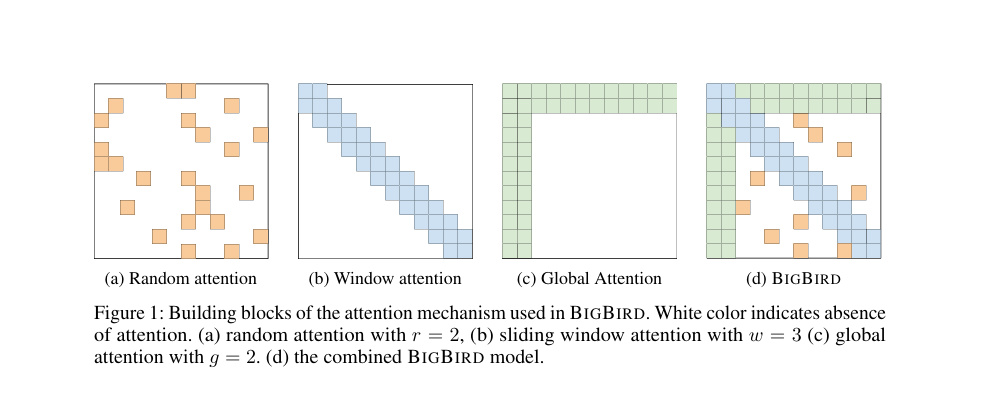

BigBird đã đạt được những kết quả tiên tiến trong các nhiệm vụ NLP khác nhau, chẳng hạn như trả lời câu hỏi và tóm tắt tài liệu, đồng thời cũng đã được áp dụng cho dữ liệu gen. Việc triển khai hiệu quả sự chú ý thưa thớt của mô hình đã khiến mô hình này trở thành một công cụ có giá trị để xử lý các chuỗi dài trong xử lý ngôn ngữ tự nhiên và các lĩnh vực khác. Việc triển khai sự chú ý thưa thớt của BigBird đã làm giảm sự gia tăng bậc hai trong tính toán và đầu bộ nhớ của sự chú ý thuần túy đối với tuyến tính.



https://arxiv.org/pdf/2007.14062

# Reformers and Performers

https://medium.com/walmartglobaltech/reformers-and-performers-a-comprehensive-summary-of-space-and-time-optimizations-on-transformers-c00178e31843

## Chunking in NLP

https://towardsdatascience.com/how-to-chunk-text-data-a-comparative-analysis-3858c4a0997a

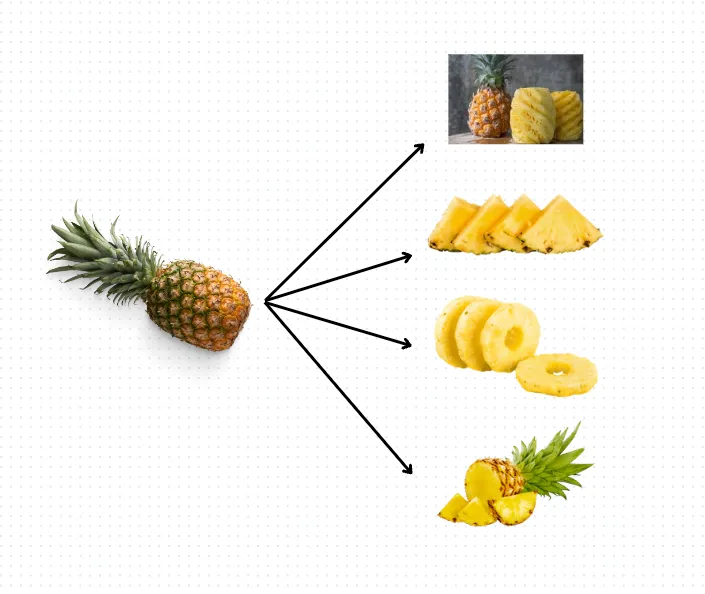

Hình trên biểu diễn một trái dứa, cách mà chúng ta chia nó cách phần khác nhau cũng như chúng ta chia một text thành các chucks riêng lẻ vậy. Ở dứa chúng ta chia chúng ra có thể giúp chúng ta ăn dễ dàng hơn hay nấu nướng dễ hơn. In NLP chucking cũng cho ta nhiều lợi ích :

Cách chuking hoạt động :

At a high level, these methods typically fall into one of two categories. The first, rule-based methods, hinge on the use of explicit separators such as punctuation or space characters, or the application of sophisticated systems like regular expressions, to partition text into chunks. The second category, semantic clustering methods, leverages the inherent meaning embedded in the text to guide the chunking process. These might utilize machine learning algorithms to discern context and infer natural divisions within the text.

Ở mức độ cao, các phương pháp này thường rơi vào một trong hai loại.

Phương pháp đầu tiên, **dựa trên quy tắc**, xoay quanh việc sử dụng các dấu phân tách rõ ràng như dấu chấm câu hoặc ký tự dấu cách hoặc ứng dụng các hệ thống phức tạp như biểu thức thông thường để phân chia văn bản thành các phần.

Loại thứ hai, **các phương pháp phân cụm ngữ nghĩa**, tận dụng ý nghĩa vốn có trong văn bản để hướng dẫn quá trình phân nhóm. Chúng có thể sử dụng thuật toán học máy để phân biệt ngữ cảnh và suy ra sự phân chia tự nhiên trong văn bản.



**Các Trường Hợp Sử Dụng của Chunking Văn Bản**

Chunking văn bản có thể được sử dụng trong nhiều ứng dụng khác nhau:

1. **Tóm Tắt Văn Bản:** Bằng cách phân chia các đoạn văn bản lớn thành những phần nhỏ hơn, chúng ta có thể tóm tắt từng phần một cách riêng biệt, dẫn đến một bản tóm tắt tổng thể chính xác hơn.

2. **Phân Tích Cảm Xúc:** Phân tích cảm xúc của những đoạn ngắn, có cấu trúc mạch lạc thường mang lại kết quả chính xác hơn so với việc phân tích toàn bộ tài liệu.

3. **Trích Xuất Thông Tin:** Chunking giúp xác định các thực thể hoặc cụm từ cụ thể trong văn bản, nâng cao quá trình truy xuất thông tin.

4. **Phân Loại Văn Bản:** Việc chia văn bản thành các đoạn nhỏ cho phép các bộ phân loại tập trung vào các đơn vị có ngữ cảnh có ý nghĩa hơn thay vì toàn bộ tài liệu, điều này có thể cải thiện hiệu suất.

5. **Dịch Máy:** Các hệ thống dịch thuật thường hoạt động trên các đoạn văn bản thay vì trên từng từ riêng lẻ hoặc toàn bộ tài liệu. Chunking có thể hỗ trợ duy trì tính mạch lạc của văn bản được dịch.

Hiểu các trường hợp sử dụng này có thể giúp bạn chọn được kỹ thuật chunking phù hợp nhất cho dự án của mình.

So Sánh Các Phương Pháp Chunking Ngữ Nghĩa của Văn Bản Không Cấu Trúc

Trong phần này của bài viết, chúng ta sẽ so sánh các phương pháp phổ biến cho việc chunking ngữ nghĩa của văn bản không cấu trúc: Bộ phân tách câu NLTK, Bộ tách văn bản Langchain, Phân cụm KMeans và Phân cụm Các Câu Liền Kề dựa trên độ tương đồng.

Trong ví dụ tiếp theo, chúng ta sẽ đánh giá kỹ thuật này bằng cách sử dụng một văn bản được trích xuất từ một tệp PDF, xử lý nó thành các câu và các cụm của chúng.

Dữ liệu chúng tôi sử dụng là một tệp PDF được xuất từ trang Wikipedia của Brazil.

Để trích xuất văn bản từ PDF và chia thành các câu bằng NLTK, chúng tôi sẽ sử dụng các hàm sau:

In [3]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.8 MB/s eta 0:00:00


In [25]:
from PyPDF2 import PdfReader
import nltk
nltk.download('punkt')

# Extracting Text from PDF
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf = PdfReader(file)
        text = " ".join(page.extract_text() for page in pdf.pages)
    return text
file_path = 'Brazil - Wikipedia.pdf'
# Extract text from the PDF and split it into sentences
text = extract_text_from_pdf(file_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
sample = text[1015:3037]
print(sample)


4,655 mi).[14]
Covering roughly half of South America's land
area, it borders all other countries and territories
on the continent except Ecuador  and Chile .[15]
Brazil's Amazon basin  includes a vast tropical
forest  home to diverse wildlife , a variety of
ecological systems , and extensive natural
resources spann ing numerous  protected
habitats .[14] This unique environmental heritage
positions Brazil at number one of 17 megadiverse
countries . The country's natural richness is also
the subj ect of significant global interest, as
environmental degradation  (through processes
such as deforestation ) has direct impacts on
global issues such as climate change  and
biodiversity loss .
The territ ory of present-day Brazil was inhabited
by numerous tribal nations  prior to the landing of
explorer Pedro Álvares Cabral  in 1500.
Subsequently claimed by the Portuguese Empire ,
Brazil remained a Portuguese colony  until 1808,
when the capital of the empire was transferred
from Lisb on to Rio

### NLTK Sentence Tokenizer


Bộ công cụ ngôn ngữ tự nhiên (NLTK) cung cấp một chức năng hữu ích để chia văn bản thành các câu. Trình mã thông báo câu này chia một khối văn bản nhất định thành các câu thành phần, sau đó có thể được sử dụng để xử lý thêm.

In [26]:

# Splitting Text into Sentences
def split_text_into_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences
sentences = split_text_into_sentences(text)
sentences

"""Trả về bản sao văn bản được mã hóa câu bằng cách sử dụng
mã thông báo câu được đề xuất của NLTK (hiện là PunktSentenceTokenizer cho ngôn ngữ được chỉ định)."""

'Trả về bản sao văn bản được mã hóa câu bằng cách sử dụng \nmã thông báo câu được đề xuất của NLTK (hiện là PunktSentenceTokenizer cho ngôn ngữ được chỉ định).'

In [27]:
len(sentences)

3102

In [36]:
a = []
for i in range(len(sentences)):

  a.append(len(sentences[i]))


In [40]:
print(sum(a)/len(a))

79.4474532559639


3102 sentences và trung bình 79 từ cho sentence



---

**Đánh giá Bộ phân tách câu NLTK**  
Trong khi Bộ phân tách câu NLTK là một cách đơn giản và hiệu quả để chia một khối văn bản lớn thành các câu riêng lẻ, nó cũng có một số hạn chế nhất định:

1. **Phụ thuộc vào ngôn ngữ**: Bộ phân tách câu NLTK phụ thuộc rất nhiều vào ngôn ngữ của văn bản. Nó hoạt động tốt với tiếng Anh nhưng có thể không cung cấp kết quả chính xác với các ngôn ngữ khác mà không cần cấu hình bổ sung.

2. **Viết tắt và dấu câu**: Bộ phân tách có thể đôi khi hiểu sai các viết tắt hoặc dấu câu khác ở cuối câu. Điều này có thể dẫn đến việc các phần của câu bị coi là các câu độc lập.

3. **Thiếu hiểu biết ngữ nghĩa**: Giống như hầu hết các bộ phân tách, Bộ phân tách câu NLTK không xem xét mối quan hệ ngữ nghĩa giữa các câu. Do đó, một ngữ cảnh kéo dài qua nhiều câu có thể bị mất trong quá trình phân tách.

---



### Spacy Sentence Splitter

Spacy, một thư viện NLP mạnh mẽ khác, cung cấp chức năng mã thông báo câu dựa chủ yếu vào các quy tắc ngôn ngữ. Đó là một cách tiếp cận tương tự như NLTK.

Việc triển khai tính năng chia câu của Spacy khá đơn giản. Đây là cách thực hiện bằng Python:

In [42]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
sentences = list(doc.sents)

In [43]:
sentences

[Federative Republic of Brazil
 República Federativa do Brasil
 Flag
  Coat of arms
 Motto: 
 Ordem e Progresso
 "Order and Progress"
 Anthem: 
 Hino Nacional Brasileiro
 "Brazilian National Anthem"
 Flag anthem: ,
 Hino à Bandeira Nacional[1]
 "National Flag Anthem"
 National Seal
 Selo Nacional do Brasil
 National Seal of Brazil
 Brazil
 Brazil ,[b] officially  the Federative Republic of
 Brazil ,[c] is the largest and easternmost country
 in South America  and Latin America .,
 It is the
 world's fifth-largest coun try by area  and the
 seventh most populous .,
 Its capital is Brasília , and
 its most populous city is São Paulo .,
 Brazil is a
 federation  composed of 26 states  and a Federal
 District .,
 It is the only country in the Americas
 where Portuguese  is an official language .[11][12]
 Brazil is among the world's most multicultural
 and ethnically diverse nations, due to over a
 century of mass immigration from around the
 world .[13],
 Bounded by the Atlantic Ocean  on 

In [44]:
len(sentences)

2949

**Đánh giá Bộ tách câu của Spacy**

Bộ tách câu của Spacy thường tạo ra các đoạn văn nhỏ hơn so với Bộ tách ký tự của Langchain, vì nó tuân thủ nghiêm ngặt các ranh giới câu. Điều này có thể là lợi thế khi cần các đơn vị văn bản nhỏ hơn để phân tích.

Tuy nhiên, giống như NLTK, hiệu suất của Spacy phụ thuộc vào chất lượng của văn bản đầu vào. Đối với văn bản có dấu câu hoặc cấu trúc kém, các ranh giới câu được xác định có thể không luôn chính xác.

Bây giờ, chúng ta sẽ xem cách Langchain cung cấp một khuôn khổ để phân đoạn dữ liệu văn bản và so sánh nó với NLTK và Spacy.

### Langchain Character Text Splitter


**Bộ tách ký tự của Langchain** hoạt động bằng cách phân đoạn văn bản một cách đệ quy tại các ký tự cụ thể. Nó đặc biệt hữu ích cho văn bản tổng quát.

Bộ tách này được xác định bởi một danh sách các ký tự. Nó cố gắng tách văn bản dựa trên các ký tự này cho đến khi các đoạn văn bản được tạo ra đáp ứng tiêu chí kích thước mong muốn. Danh sách mặc định là [“\n\n”, “\n”, “ ”, “”], nhằm giữ các đoạn văn, câu và từ lại với nhau càng nhiều càng tốt để duy trì tính nhất quán về ngữ nghĩa.

In [46]:
%pip install -qU langchain-text-splitters



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


In [47]:
from langchain_text_splitters import RecursiveCharacterTextSplitter


In [49]:
# Initialize the text splitter with custom parameters
custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 100,
    chunk_overlap  = 20,
    # Use length of the text as the size measure
    length_function = len,

)

# Create the chunks
texts = custom_text_splitter.create_documents([sample])

# Print the first two chunks
print(f'### Chunk 1: \n\n{texts[0].page_content}\n\n=====\n')
print(f'### Chunk 2: \n\n{texts[1].page_content}\n\n=====')



### Chunk 1: 

4,655 mi).[14]
Covering roughly half of South America's land

=====

### Chunk 2: 

area, it borders all other countries and territories

=====


In [50]:
# Initialize the text splitter with custom parameters
custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 300,
    chunk_overlap  = 30,
    # Use length of the text as the size measure
    length_function = len,
    # Use only "\n\n" as the separator
    separators = ['\n']
)

# Create the chunks
custom_texts = custom_text_splitter.create_documents([sample])

# Print the first two chunks
print(f'### Chunk 1: \n\n{custom_texts[0].page_content}\n\n=====\n')
print(f'### Chunk 2: \n\n{custom_texts[1].page_content}\n\n=====')

### Chunk 1: 

4,655 mi).[14]
Covering roughly half of South America's land
area, it borders all other countries and territories
on the continent except Ecuador  and Chile .[15]
Brazil's Amazon basin  includes a vast tropical
forest  home to diverse wildlife , a variety of

=====

### Chunk 2: 

ecological systems , and extensive natural
resources spann ing numerous  protected
habitats .[14] This unique environmental heritage
positions Brazil at number one of 17 megadiverse
countries . The country's natural richness is also
the subj ect of significant global interest, as

=====


In [51]:
# Print the sampled chunks
print("====   Sample chunks from 'Standard Parameters':   ====\n\n")
for i, chunk in enumerate(texts):
  if i < 4:
    print(f"### Chunk {i+1}: \n{chunk.page_content}\n")

print("====   Sample chunks from 'Custom Parameters':   ====\n\n")
for i, chunk in enumerate(custom_texts):
  if i < 4:
    print(f"### Chunk {i+1}: \n{chunk.page_content}\n")

====   Sample chunks from 'Standard Parameters':   ====


### Chunk 1: 
4,655 mi).[14]
Covering roughly half of South America's land

### Chunk 2: 
area, it borders all other countries and territories

### Chunk 3: 
on the continent except Ecuador  and Chile .[15]
Brazil's Amazon basin  includes a vast tropical

### Chunk 4: 
forest  home to diverse wildlife , a variety of
ecological systems , and extensive natural

====   Sample chunks from 'Custom Parameters':   ====


### Chunk 1: 
4,655 mi).[14]
Covering roughly half of South America's land
area, it borders all other countries and territories
on the continent except Ecuador  and Chile .[15]
Brazil's Amazon basin  includes a vast tropical
forest  home to diverse wildlife , a variety of

### Chunk 2: 
ecological systems , and extensive natural
resources spann ing numerous  protected
habitats .[14] This unique environmental heritage
positions Brazil at number one of 17 megadiverse
countries . The country's natural richness is also
the

Evaluating the Langchain Character Text Splitter


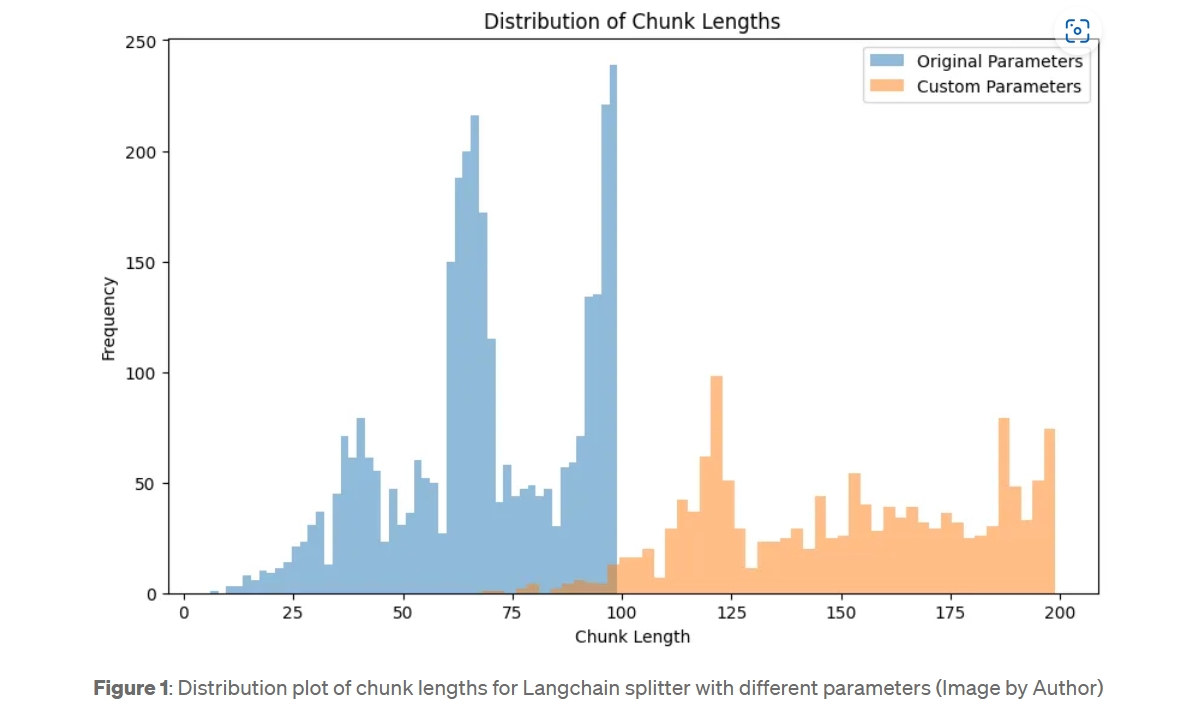

### Langchain Character Text Splitter vs. NLTK and Spacy


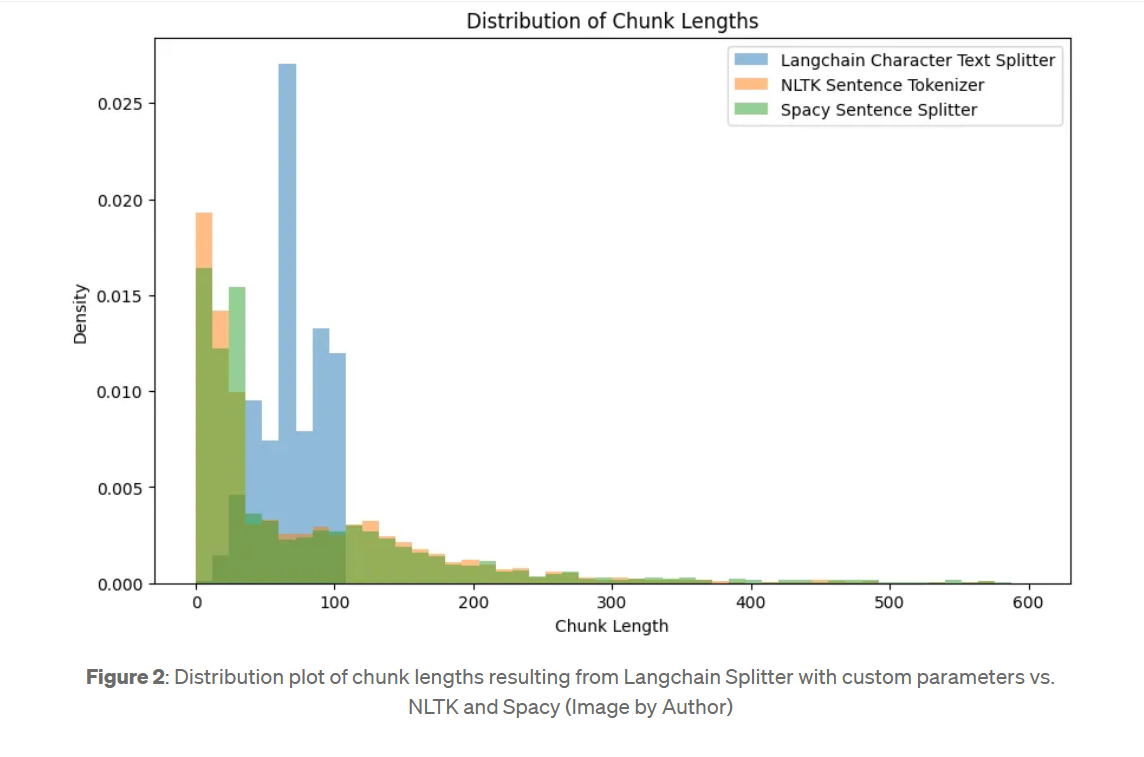

### KMeans Clustering


In [53]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 7.4 MB/s eta 0:00:00


In [58]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import huggingface_hub
import logging

# Set the cache directory
cache_dir = "/path/to/your/cache/directory"  # Replace with your desired cache directory

# Configure logging to suppress warnings
# This is used instead of wrap_deprecation_warning because it is deprecated
logging.basicConfig(level=logging.ERROR) # Suppress warnings, adjust level as needed

# Load the Sentence Transformer model, specifying the cache directory and timeout
model = SentenceTransformer('all-MiniLM-L6-v2', cache_folder=cache_dir, local_files_only=False)

# Define a list of sentences (your text data)
sentences = ["This is an example sentence.", "Another sentence goes here.", "..."]

# Generate embeddings for the sentences
embeddings = model.encode(sentences)

# Choose an appropriate number of clusters (here we choose 5 as an example)
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)

OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like sentence-transformers/all-MiniLM-L6-v2 is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')

# Define a list of stop words
stop_words = set(stopwords.words('english'))

# Define a function to clean sentences
def clean_sentence(sentence):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)
    # Convert to lower case
    tokens = [w.lower() for w in tokens]
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    words = [w for w in words if not w in stop_words]
    return words
num_clusters = 3

# Compute and print Word Clouds for each cluster
for i in range(num_clusters):
    cluster_sentences = [sentences[j] for j in range(len(sentences)) if clusters[j] == i]
    cleaned_sentences = [' '.join(clean_sentence(s)) for s in cluster_sentences]
    text = ' '.join(cleaned_sentences)

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i}")
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'clusters' is not defined